# **<span style="color:darkslateblue">"World Universities Ranking" Dataset Analysis</span>**

# **<span style="color:darkslateblue">Implementing EDA (Exploratory Data Analysis)</span>**

## **<span style="color:slateblue">Chapter 3: Data Science</span>**

### **<span style="color:slateblue">Final Project</span>**

### **<span style="color:darkslateblue">Samira Shemirani</span>**

**What is<span style="color:red"> CWUR</span>?** <br>
The <span style="color:red">C</span>enter for <span style="color:red">W</span>orld <span style="color:red">U</span>niversity <span style="color:red">R</span>ankings is a prominent consulting firm that offers guidance, strategic perspectives, and consultancy support to both governments and educational institutions with the aim of enhancing their educational and research achievements.<br>
Starting in 2012, CWUR has been releasing the sole global university ranking that evaluates education quality, employability, faculty excellence, and research performance without depending on surveys or data submissions from universities.

**What are the <span style="color:darkorchid">Features</span> and what is the <span style="color:olivedrab">Target</span>?**<br>
***<span style="color:darkorchid">Features:</span>***<br>
* World Rank<br>
* Institution<br>
* Location<br>
* National Rank<br>
* Quality of Education<br>
* Alumni Employment<br>
* Quality of Faculty<br>
* Research Output<br>
* Quality Publications<br>
* Influence<br>
* Citations<br>

***<span style="color:olivedrab">Target:</span>***<br>
* Score


<span style="color:midnightblue">**What is the purpose of this project?**<br>
The objective of this project is to refine the dataset, ready it for processing, and conduct the necessary data processing.<br>
1- Pre-processing<br>
2- Error checking<br>
3- Re-processing</span>

<span style="color:midnightblue">**Table of content:**</span><br>
<span style="color:green">**1. Cleaning (Pre-processing, Error checking, and Re-processing)**</span><br>
<span style="color:green">**2. Just one level preceding visualization!**</span><br>
<span style="color:green">**3. EDA on our dataset!!!**</span><br>
<span style="color:green">__ **a) Categorical Variables Analysing**</span><br>
<span style="color:green">__ **b) Numerical Variables Analysing**</span><br>
<span style="color:green">__ **c) Bi-Numerical Variables Analysing**</span><br>
<span style="color:green">__ **d) Categorical / Numerical Variables Analysing**</span><br>
<span style="color:green">__ **e) Some other plottings**</span><br>

In [1]:
#!pip install pycountry-convert
#!pip install geopy
#!pip install pycountry
#!pip install pycountry_convert
#!pip install plotly.offline

In [2]:
# importing the required libraries
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import pandas_profiling as pdp
import ydata_profiling as pdp

from geopy.geocoders import Nominatim

import pycountry
import pycountry_convert as pc

import plotly.graph_objects as go
import plotly.express as px

# for solving the problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use("_mpl-gallery")

In [3]:
# import dataset
data = pd.read_csv("D:\\IMT\\3- Data Science\\14- Final project\\eighteen_nineteen_university_datasets.csv", encoding = 'unicode_escape')

# maybe we get the utf-8 error, then we implement: encoding = 'unicode_escape'
# 'utf-8' codec can't decode byte 0xa0 in position 53: invalid start byte

# addressing the dataset for Kaggle must be like this
#'../input/eighteen_nineteen_university_datasets.csv', encoding='unicode_escape'

data

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [4]:
# making this dataset a 2D DataFrame which we can work in future
df = pd.DataFrame(data)

## <span style="color:green">1. Cleaning (Pre-processing, Error checking, and Re-processing)</span>

In [5]:
# change the name of the header of the columns
df.columns = df.columns.str.replace('\xa0', '_') # we are suspect that we have this in our column header name, so replace it
df.columns = df.columns.str.replace(' ', '_')    # it is easier to work with "_" than the space in the headers
df.columns

# we can use following code instead of above code
# df.rename(columns={
#     'Quality\xa0of Education':'Quality Education' ,
#     'Quality\xa0of Faculty':'Quality Faculty'
#     },inplace=True)

Index(['World_Rank', 'Institution', 'Location', 'National_Rank',
       'Quality_of_Education', 'Alumni_Employment', 'Quality_of_Faculty',
       'Research_Output', 'Quality_Publications', 'Influence', 'Citations',
       'Score'],
      dtype='object')

In [6]:
# just check the info() to achieve some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Quality_of_Education  1000 non-null   object 
 5   Alumni_Employment     1000 non-null   object 
 6   Quality_of_Faculty    1000 non-null   object 
 7   Research_Output       1000 non-null   object 
 8   Quality_Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


* We have 12 columns.
* We assume 11 features.
* And we assume 1 main target.
* There are 1000 values in each row and there are no NaNs.
* We have to check for the "> 1000" and "-" values that we've seen earlier in excel and solve their problem.
* Some numeric columns like "Research_Output" are in "object" type, we have to fix this, too.

In [7]:
# check on NaN value/s again
df.isna().sum()

# also another way for checking is
#df.isnull().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Quality_of_Education    0
Alumni_Employment       0
Quality_of_Faculty      0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

* In the first impression we see no Missing Values, but take another deeper look into the DataFrame.

* Now first, we use a '.deepcopy()'.
* So, when we use 'copy.deepcopy(df)', we are creating a new DataFrame that is a completely independent copy of the original DataFrame df.
* Any changes made to the copied DataFrame (df1) will not affect the original, and vice versa.
* This is particularly useful when you want to work with a separate copy of the data to prevent unintended side effects.

In [8]:
df1 = copy.deepcopy(df)

In [9]:
# replace the values which are equal to '> 1000' by '1001'
df1.replace('> 1000', 1001, inplace=True)

# replace the values which are equal to '-' by 'np.NaN'
df1.replace('-', np.nan, inplace=True)

* Now there is no "> 1000" in the DataFrame, instead of that we have "1001"s.
* Now there is no "-" in the DataFrame, instead of that we have "NaN" values which we can work with later.

**Now let's check for the amount of NaN values again:**

In [10]:
# check on NaN value/s
df1.isna().sum()

# also another way is
#df.isnull().sum()

World_Rank                0
Institution               0
Location                  0
National_Rank             0
Quality_of_Education    597
Alumni_Employment         0
Quality_of_Faculty      731
Research_Output           0
Quality_Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

* Now you can see that we had NaN values!<br>
* Hence, the columns labeled "Quality_of_Education" (OoE) and "Quality_of_Faculty" (QoF) contain a significant number of hyphens "-".<br>
* Let's now check out these two columns more closely.

In [11]:
# closer look at "Quality_of_Education"
QoE_dashes = df1[df1.Quality_of_Education.isna()]
print(f"Shape size of '-' in 'Quality of Education'column: {QoE_dashes.shape}")
print(f"Maximum 'Score' of this column: {QoE_dashes.Score.max()}")
print(f"Minimum 'Score' of this column: {QoE_dashes.Score.min()}")
print(f"Maximum 'World Rank' of this column: {QoE_dashes.World_Rank.max()}")
print(f"Minimum 'World Rank' of this column (The less the better): {QoE_dashes.World_Rank.min()}")

Shape size of '-' in 'Quality of Education'column: (597, 12)
Maximum 'Score' of this column: 87.7
Minimum 'Score' of this column: 69.8
Maximum 'World Rank' of this column: 1000
Minimum 'World Rank' of this column (The less the better): 22


In [12]:
# closer look at "Quality_of_Faculty"
QoF_dashes = df1[df1.Quality_of_Faculty.isna()]
print(f"Shape size of '-' in 'Quality of Faculty'column: {QoF_dashes.shape}")
print(f"Maximum 'Score' of this column: {QoF_dashes.Score.max()}")
print(f"Minimum 'Score' of this column: {QoF_dashes.Score.min()}")
print(f"Maximum 'World Rank' of this column: {QoF_dashes.World_Rank.max()}")
print(f"Minimum 'World Rank' of this column (The less the better): {QoF_dashes.World_Rank.min()}")

Shape size of '-' in 'Quality of Faculty'column: (731, 12)
Maximum 'Score' of this column: 83.7
Minimum 'Score' of this column: 69.8
Maximum 'World Rank' of this column: 1000
Minimum 'World Rank' of this column (The less the better): 60


**How many rows have at least one dash "-" ?**

In [13]:
df1_NaNs = df1[df1.isnull().any(axis=1)]

In [14]:
df1_NaNs.shape

(777, 12)

* There are 777 rows of 1000 rows, in which at least one of their columns contains a dash "-" character.

In [15]:
df1.shape

(1000, 12)

* More than 77% of the rows have at least one "-".
* If we want to drop a row of these Missing Values, that means 77% of the rows will be deleted.
* This does not make sense!

**Let's check out the NaN values in the shape of the Bar plot:**

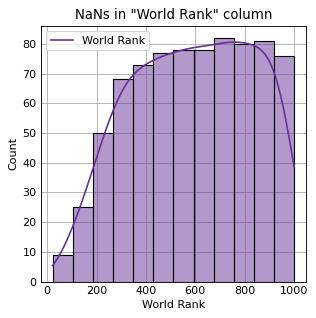

In [16]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(data=df1_NaNs, x='World_Rank', kde=True, color='rebeccapurple') # , binwidth=50

plt.legend(['World Rank'], loc='best')
plt.title('NaNs in "World Rank" column', fontsize=12)
plt.xlabel('World Rank')

plt.gcf().subplots_adjust(left=0.12, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\1\\hist\\World_Rank_hist.png")

plt.show()

**Check the type of each column:**

In [17]:
df1.dtypes

World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Quality_of_Education     object
Alumni_Employment        object
Quality_of_Faculty       object
Research_Output          object
Quality_Publications     object
Influence                object
Citations                object
Score                   float64
dtype: object

* "World Rank" a numeric column. It is "int64", then correct.
* "Institution" a letter column. It is "object", then correct.
* "Location" a letter column. It is "object", then correct.
* "National Rank" a numeric column. It is "int64", then correct.
* "Quality of Education" a numeric column. It should change to "float64"!
* "Alumni Employment" a numeric column. It should change to "int64"!
* "Quality of Faculty" a numeric column. It should change to "float64"!
* "Research Output" a numeric column. It should change to "int64"!
* "Quality Publications" a numeric column. It should change to "int64"!
* "Influence" a numeric column. It should change to "int64"!
* "Citations" a numeric column. It should change to "int64"!
* "Score" a numeric column. It is "float64", then correct.

**Let's convert those columns type**

In [18]:
convert_list =['Quality_of_Education',
               'Alumni_Employment',
               'Quality_of_Faculty',
               'Research_Output',
               'Quality_Publications',
               'Influence',
               'Citations']

In [19]:
df2 = copy.deepcopy(df1)

In [20]:
df2[convert_list] = df2[convert_list].apply(pd.to_numeric)

In [21]:
df2.dtypes

World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Quality_of_Education    float64
Alumni_Employment         int64
Quality_of_Faculty      float64
Research_Output           int64
Quality_Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object

* Now their type seems to be correct!

**Let's check out all columns together in HeatMap plot:**

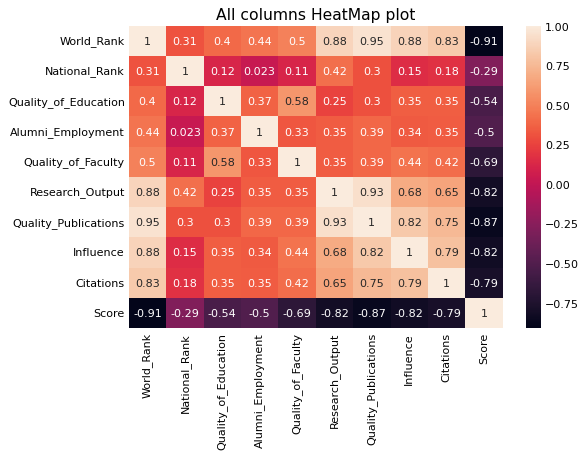

In [22]:
plt.figure(figsize=(8,6), dpi=80)

sns.heatmap(df2.corr(), annot=True)

plt.title('All columns HeatMap plot', fontsize=14)

plt.gcf().subplots_adjust(left=0.22, right=0.95, top=0.90, bottom=0.27)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\1\\heatmap\\df2_heatmap.png")

plt.show()

**After all, we decided to remove these two columns of "Quality of Education" and "Quality of Faculty". But, why?**<br>
* There are lots of dashes "-" in the DataFrame (one has 591, and another has 731 dashes), so it is not advisable to remove the rows that contain dashes, as we might lose a significant number of rows from our DataFrame (losing 77% of 1000 rows!).

* According to the histogram that we plotted earlier, there are some dashes "-" in lower-ranked universities, and there are also many dashes in higher-ranked universities. Since both lower and higher ranks have these dashes, we cannot replace them with a single (suitable) value, as it may negatively impact the entire dataset, especially if we intend to build a model based on it. A single (suitable) value won't work for both low and high-ranking universities.

* Hence, because the correlation between these two columns and the target variable is weaker compared to other columns, we have decided to eliminate these two columns.

**So, let's remove these two columns.**

In [23]:
df3 = copy.deepcopy(df2)

In [24]:
df3 = df3.drop(['Quality_of_Education','Quality_of_Faculty'], axis='columns')
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,3,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8


**Let's check our final DataFrame (df3) again,**

First, check the shape (size),

In [25]:
df3.shape

(1000, 10)

* Ok! The 2 mentioned columns removed successfully!

Second, check the type.

In [26]:
df3.dtypes

World_Rank                int64
Institution              object
Location                 object
National_Rank             int64
Alumni_Employment         int64
Research_Output           int64
Quality_Publications      int64
Influence                 int64
Citations                 int64
Score                   float64
dtype: object

* All types of columns look fine.

Third, check out this DataFrame information,

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


* Information of the DataFrame also seems nice.

At the fourth step, check for having any Missing Values,

In [28]:
df3.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Alumni_Employment       0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

And at last, check for any duplicate value in the DataFrame,

In [29]:
df3.duplicated().sum()

0

It looks appealing, too.

BTW, for having a complete overview we can also use "PandasProfiling"!

In [30]:
#pdp.ProfileReport(df3)

***It appears our final DataFrame, df3, is ready.***

## <span style="color:green">2. Just one level preceding visualization and plotting!</span>

https://geopy.readthedocs.io/en/stable/

You can use the 'Nominatim' geocoder to convert addresses or place names into geographic coordinates (longitude and latitude) and vice versa.

In [31]:
# add 'Longitude' and 'Latitude' columns to the end of our final DataFrame
# we add them in NaN, that we can work with them later
df3["Longitude"] = np.NaN
df3["Latitude"] = np.NaN

In [32]:
df3.shape

(1000, 12)

* Ok, the two new NaN columns added

In [33]:
# initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="Samira")

**Do these steps in the following cell:**
* in **"try"** part:<br>
    - From the DataFrame, step by step, take the name of the university (df.Institution) and the name of the place (country) of the university (df.Location) and put it in a column called "Loc".
    - Find the address of any "Loc" using "geolocator.geocode()" and save it in "address".
    - Then we have these two final lines of code, which modifies the "Latitude" column of a particular row in the DataFrame (df3) by replacing its value with a latitude coordinate retrieved from an external source, such as a geocoding process. This is handy when you need to integrate or revise geographic data in a DataFrame using location information from an external data provider.
* in **"except"** part:<br>
Please note that this section is intended for situations in which the code cannot simultaneously identify both the name of the university and the name of the country, relying solely on the name of the country.<br>
    - From the DataFrame, step by step, take the name of the place (country) of the university (df.Location) and put it in a column called "Loc".
    - Find the address of any "Loc" using "geolocator.geocode()" and save it in "address".
    - Then we have these two final lines of code, which modifies the "Latitude" column of a particular row in the DataFrame (df3) by replacing its value with a latitude coordinate retrieved from an external source, such as a geocoding process. This is handy when you need to integrate or revise geographic data in a DataFrame using location information from an external data provider.

In [34]:
for i in range(len(df)):
    try:
        Loc = df.Location.iloc[i] + "," + df.Institution.iloc[i]
        address = geolocator.geocode(Loc)
        df3["Latitude"].iloc[i] = address.latitude
        df3["Longitude"].iloc[i] = address.longitude

    except:
        Loc = df.Location.iloc[i]
        address = geolocator.geocode(Loc)
        df3["Latitude"].iloc[i] = address.latitude
        df3["Longitude"].iloc[i] = address.longitude

* This section of the code requires some time to execute.
* e.g., start time was 9:24 pm and the finish time was 9:36 pm, normally it took about 10-12 minutes for this DataFrame.
* Remember that you might need internet connection in here.
* Also, remember that to prevent errors, you can change your computer's DNS.

**Now let's find the continent of countries!**

In [35]:
# add a new NaN column to the end of the DataFrame for the continent
df3['Continent'] = np.NaN

In [36]:
df3.shape

(1000, 13)

* Sounds great!

**What does this cell do?**:
* The 2nd line of code, the variable "country_code" is assigned the two-letter "alpha-2" country code based on the country name extracted from the "Location" column of the DataFrame (df3) at a specific row indexed by "i". The "cn_name_format" parameter is set to "default" to specify the default format for the country name.

* The 3rd line of code assigns the continent code to the "Continent" column of the DataFrame (df3) at a specific row indicated by the index "i". The continent code is determined by using the "country_alpha2_to_continent_code" function, which takes the previously obtained "country_code" as input and returns the corresponding continent code.

In [37]:
for i in range(len(df3)):
    # obtain the conuntry code
    country_code = pc.country_name_to_country_alpha2(df3.Location.iloc[i], cn_name_format="default")
    # obtain the continent name with the help of the country code
    df3['Continent'].iloc[i] = pc.country_alpha2_to_continent_code(country_code)
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent
0,1,Harvard University,USA,1,1,1,1,1,1,100.0,-71.126782,42.367909,NA
1,2,Stanford University,USA,2,3,10,4,3,2,96.7,-122.169365,37.431314,NA
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1,-71.096627,42.358253,NA
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.092005,52.210946,EU
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.255668,51.758708,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,67.062022,24.923236,AS
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.344753,22.484733,AS
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,140.150724,39.731343,AS
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8,126.931634,36.769988,AS


**It looks good, but another thing should be done for the names of "Continents".**<br>
The provided code snippet is used to replace continent codes (e.g., 'NA' for North America) in the "Continent" column of the DataFrame (df3) with their corresponding full continent names (e.g., 'North America'):<br>

In [38]:
df3.Continent.replace(
    {
        'NA': 'North America',
        'SA': 'South America',
        'AS': 'Asia',
        'OC': 'Australia',
        'AF': 'Africa',
        'EU': 'Europe'
    }, inplace=True)
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent
0,1,Harvard University,USA,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America
1,2,Stanford University,USA,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America
2,3,Massachusetts Institute of Technology,USA,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.092005,52.210946,Europe
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.255668,51.758708,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,67.062022,24.923236,Asia
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.344753,22.484733,Asia
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,140.150724,39.731343,Asia
998,999,Soonchunhyang University,South Korea,35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia


**We have to do one more thing**:<br>
Change the names of some countries so that we can later get their ISO code.

In [39]:
df3.Location = df3.Location.replace(
    {
        'USA':'United States',
        'Taiwan':'Taiwan, Province of China',
        'Iran':'Iran, Islamic Republic of',
        'South Korea':'Korea, Republic of',
        'Russia':'Russian Federation',
        'Slovak Republic':'Slovakia',
        'Macau':'Macao',
        'Czech Republic':'Czechia',
    })
df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent
0,1,Harvard University,United States,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America
1,2,Stanford University,United States,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America
2,3,Massachusetts Institute of Technology,United States,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.092005,52.210946,Europe
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.255668,51.758708,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,67.062022,24.923236,Asia
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.344753,22.484733,Asia
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,140.150724,39.731343,Asia
998,999,Soonchunhyang University,"Korea, Republic of",35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia


* For example, in the 1st-3rd lines of the above output, you can observe the change in the name of America!

**This code snippet accomplishes the following tasks**:
* **"input_countries = df3.Location"**:
    - Extracts the values from the "Location" column of the DataFrame (df3) and stores them in the variable "input_countries".
    - These values are typically country names.

* **"countries = {}"**:
    - Initializes an empty dictionary called countries.
    - This dictionary will be used to create a mapping between country names and their corresponding *ISO alpha-3* country codes.

* The **for** loop iterates through each country in the list of recognized countries provided by the "pycountry.countries" module.
    - Inside the loop, **"countries[country.name] = country.alpha_3"** creates an entry in the countries dictionary, mapping the full country name (country.name) to its *ISO alpha-3* country code (country.alpha_3).
    - This effectively builds a lookup table.

    - **"codes = [countries.get(country) for country in input_countries]"**: Creates a list called codes by looking up the *ISO alpha-3* country code for each country name in the input_countries list, using the previously created countries dictionary as a lookup reference.

* **"df3['Iso_loc'] = codes"**:
    - Adds a new column called "Iso_loc" to the DataFrame (df3) and populates it with the *ISO alpha-3* country codes obtained in the previous step.

The code snippet concludes by displaying the updated DataFrame (df3), which now includes the "Iso_loc" column containing *ISO alpha-3* country codes alongside the original data.

In [40]:
input_countries = df3.Location

countries = {}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country) for country in input_countries]

df3['Iso_loc'] = codes

df3

,World_Rank,Institution,Location,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude,Continent,Iso_loc
0,1,Harvard University,United States,1,1,1,1,1,1,100.0,-71.126782,42.367909,North America,USA
1,2,Stanford University,United States,2,3,10,4,3,2,96.7,-122.169365,37.431314,North America,USA
2,3,Massachusetts Institute of Technology,United States,3,11,30,15,2,6,95.1,-71.096627,42.358253,North America,USA
3,4,University of Cambridge,United Kingdom,1,19,12,8,6,19,94.0,0.092005,52.210946,Europe,GBR
4,5,University of Oxford,United Kingdom,2,25,9,5,7,4,93.2,-1.255668,51.758708,Europe,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,1001,1001,1001,464,673,69.8,67.062022,24.923236,Asia,PAK
996,997,University of Calcutta,India,17,716,798,966,1001,1001,69.8,88.344753,22.484733,Asia,IND
997,998,K?chi University,Japan,56,1001,1001,1001,811,673,69.8,140.150724,39.731343,Asia,JPN
998,999,Soonchunhyang University,"Korea, Republic of",35,1001,881,1001,1001,898,69.8,126.931634,36.769988,Asia,KOR


**Everything seems in order!**

Now check our final DataFrame again;

In [41]:
df3.shape

(1000, 14)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National_Rank         1000 non-null   int64  
 4   Alumni_Employment     1000 non-null   int64  
 5   Research_Output       1000 non-null   int64  
 6   Quality_Publications  1000 non-null   int64  
 7   Influence             1000 non-null   int64  
 8   Citations             1000 non-null   int64  
 9   Score                 1000 non-null   float64
 10  Longitude             1000 non-null   float64
 11  Latitude              1000 non-null   float64
 12  Continent             1000 non-null   object 
 13  Iso_loc               1000 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 109.5+ KB


In [43]:
df3.isna().sum()

World_Rank              0
Institution             0
Location                0
National_Rank           0
Alumni_Employment       0
Research_Output         0
Quality_Publications    0
Influence               0
Citations               0
Score                   0
Longitude               0
Latitude                0
Continent               0
Iso_loc                 0
dtype: int64

***<span style="color:rebeccapurple">Great, the DataFrame is now prepared for Exploratory Data Analysis (EDA)!</span>***

## <span style="color:green">3. EDA on our dataset!!!</span>

**First of all! Histograms!**

> Histogram of "World Rank"

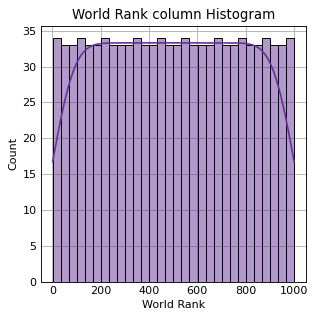

In [44]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["World_Rank"], bins=30, kde=True, color='rebeccapurple')

plt.title('World Rank column Histogram')
plt.xlabel('World Rank')

plt.gcf().subplots_adjust(left=0.12, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\World_Rank_hist.png")

plt.show()

> Histogram of "Location"

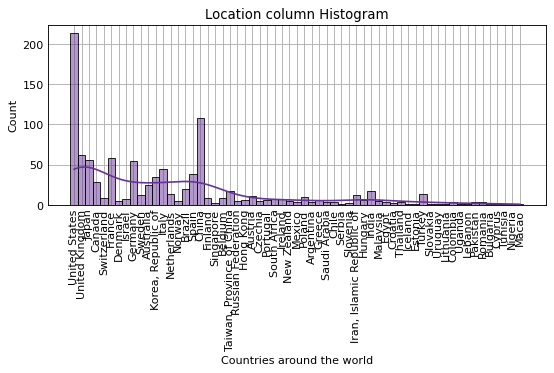

In [45]:
plt.figure(figsize=(7,3), dpi=80) #figsize=(13,10)

sns.histplot(df3["Location"], bins=30, kde=True, color='rebeccapurple')

plt.title('Location column Histogram')
plt.xlabel('Countries around the world')

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.06, right=0.95, top=0.95, bottom=0.20)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\Location_hist.png")

plt.show()

> Histogram of "National Rank"

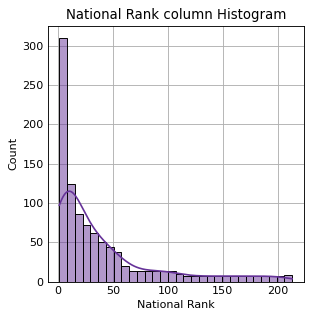

In [46]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["National_Rank"], bins=30, kde=True, color='rebeccapurple')

plt.title('National Rank column Histogram')
plt.xlabel('National Rank')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\National_Rank_hist.png")

plt.show()

> Histogram of "Alumni Employment"

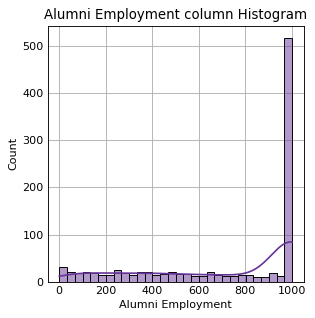

In [47]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Alumni_Employment"], bins=30, kde=True, color='rebeccapurple')

plt.title('Alumni Employment column Histogram')
plt.xlabel('Alumni Employment')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Alumni_Employment_hist.png")

plt.show()

> Histogram of "Research Output"

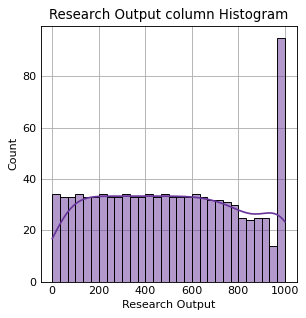

In [48]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Research_Output"], bins=30, kde=True, color='rebeccapurple')

plt.title('Research Output column Histogram')
plt.xlabel('Research Output')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Research_Output_hist.png")

plt.show()

> Histogram of "Quality Publications"

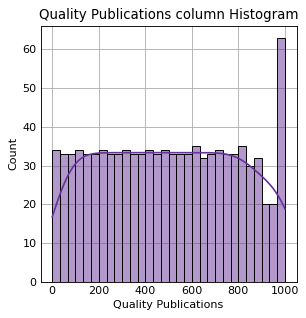

In [49]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Quality_Publications"], bins=30, kde=True, color='rebeccapurple')

plt.title('Quality Publications column Histogram')
plt.xlabel('Quality Publications')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Quality_Publications_hist.png")

plt.show()

> Histogram of "Influence"

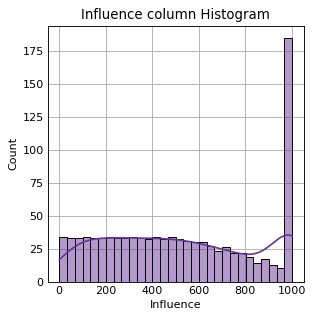

In [50]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Influence"], bins=30, kde=True, color='rebeccapurple')

plt.title('Influence column Histogram')
plt.xlabel('Influence')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Influence_hist.png")

plt.show()

> Histogram of "Citations"

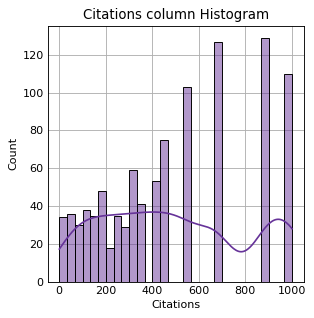

In [51]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Citations"], bins=30, kde=True, color='rebeccapurple')

plt.title('Citations column Histogram')
plt.xlabel('Citations')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Citations_hist.png")

plt.show()

> Histogram of "Score"

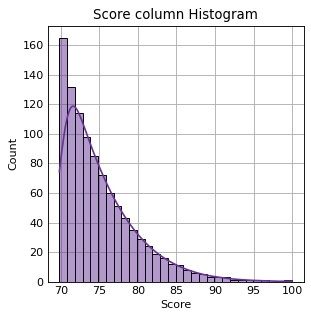

In [52]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Score"], bins=30, kde=True, color='rebeccapurple')

plt.title('Score column Histogram')
plt.xlabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Score_hist.png")

plt.show()

> Histogram of "Continent"

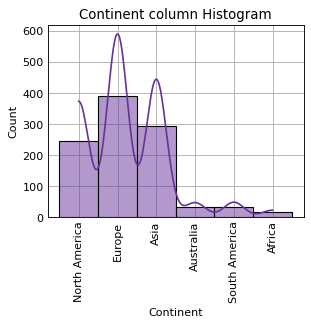

In [53]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df3["Continent"], bins=30, kde=True, color='rebeccapurple')

plt.title('Continent column Histogram')
plt.xlabel('Continent')

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.30)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Continent_hist.png")

plt.show()

> Histogram of "Quality of Education"

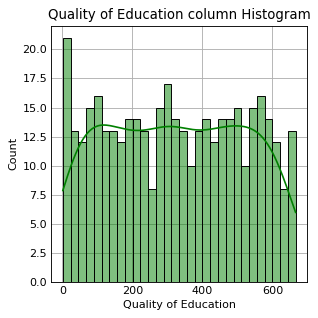

In [54]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df2["Quality_of_Education"], bins=30, kde=True, color='green')

plt.title('Quality of Education column Histogram')
plt.xlabel('Quality of Education')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Quality_of_Education_hist.png")

plt.show()

> Histogram of "Quality of Faculty"

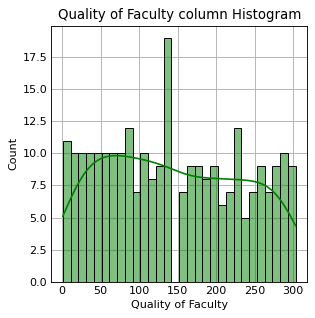

In [55]:
plt.figure(figsize=(4,4), dpi=80)

sns.histplot(df2["Quality_of_Faculty"], bins=30, kde=True, color='green')

plt.title('Quality of Faculty column Histogram')
plt.xlabel('Quality of Faculty')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\Histograms\\Quality_of_Faculty_hist.png")

plt.show()

* It's evident that if we disregard the value 1001 from these 4 plots (columns), the distributions can be seen as evenly distributed:
    - Alumni Employment
    - Research Output
    - Quality Publications
    - Influence
* Also, it's worth noting that the "National Rank" and "Score" features (plots) display a noticeable leftward skew.

### <span style="color:green">a) Categorical Variables Analysing </span>

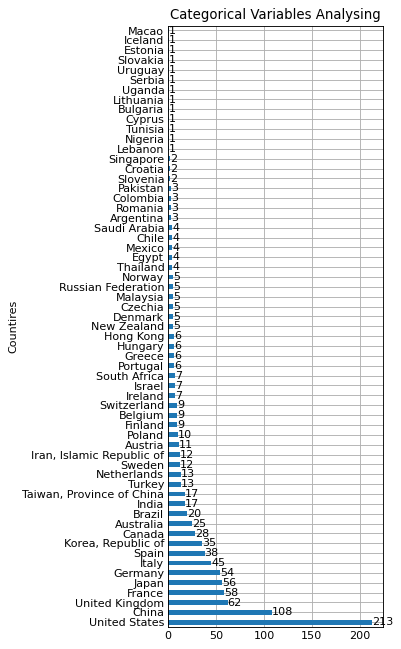

In [56]:
fig, ax = plt.subplots(figsize=(4,8), dpi=80) #figsize=(7,12)

df3.Location.value_counts().plot.barh(ax=ax)

plt.title('Categorical Variables Analysing')
plt.ylabel('Countires')

ax.bar_label(ax.containers[0])

plt.gcf().subplots_adjust(left=0.28, right=0.95, top=0.97, bottom=0.03)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.1\\Categorical_Variables_Analysing.png")

plt.show()

* The above plot displays the number of universities under 1000 in each country separately.
* For instance, this plot reveals that our country, Iran, is ranked 18th among the top countries in the world for universities under 1000, as it has 12 universities in this ranking.
* The plot also indicates that the United States holds the first position, China ranks second, and England ranks third with 62 universities.

**Moreover, to delve deeper into non-numeric (categorical) attributes, we possess:**

In [57]:
df3.select_dtypes(['object']).describe().T

,count,unique,top,freq
Institution,1000,1000,Harvard University,1
Location,1000,61,United States,213
Continent,1000,6,Europe,388
Iso_loc,1000,61,USA,213


* The 'describe' command provides us with crucial information, including:
    - In the 'Institution' column, there are 1000 unique and distinct universities, with Harvard University ranking at the top.
    - In the 'Location' column, there are 1000 values representing 61 different countries worldwide. The United States has the highest number of universities below the 1000th rank, with 213 universities falling within this range.
    - Within the 'Continent' column, we find 1000 values distributed across 6 continents. Europe boasts the highest number of universities globally, with 388 out of the top 1000 universities situated on this continent.

* Based on the table's data, the majority of universities in the ranking are affiliated with the United States.
* However, when considering the ranking as a whole, it becomes evident that European universities dominate in terms of their representation.

### <span style="color:green">b) Numerical Variables Analysing</span>

**Let's start with the numerical analysis of this DataFrame:**

In [58]:
df3.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
World_Rank,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
National_Rank,1000.0,40.023000,49.228710,1.000000,6.000000,21.000000,51.000000,213.000000
Alumni_Employment,1000.0,726.528000,343.686144,1.000000,425.750000,1001.000000,1001.000000,1001.000000
Research_Output,1000.0,508.454000,300.080433,1.000000,250.750000,500.500000,754.250000,1001.000000
Quality_Publications,1000.0,503.003000,292.854863,1.000000,250.750000,500.500000,750.250000,1001.000000
Influence,1000.0,529.156000,322.419239,1.000000,250.750000,502.500000,814.750000,1001.000000
Citations,1000.0,501.159000,308.874517,1.000000,240.000000,460.000000,673.000000,1001.000000
Score,1000.0,75.034300,4.670858,69.800000,71.500000,73.750000,77.300000,100.000000
Longitude,1000.0,11.288780,81.238994,-157.818692,-73.689965,6.109955,101.808072,174.773733
Latitude,1000.0,35.921048,19.691481,-45.864979,33.465014,39.783730,46.603354,69.681907


* Besides the insights gathered from the table above, we can also deduce the following:
    - In the "World Rank" column, the university ranks range from 1 (minimum) to 1000 (maximum).
    - For the "National Rank" column, the average national rank is 40. Additionally, the national ranks vary from 1 (minimum) to 213 (maximum).

In [59]:
df2[['Quality_of_Education', 'Quality_of_Faculty']].describe()

,Quality_of_Education,Quality_of_Faculty
count,403.000000,269.000000
mean,323.406948,144.817844
std,194.084118,88.636986
min,1.000000,1.000000
25%,151.500000,68.000000
50%,321.000000,140.000000
75%,490.500000,223.000000
max,666.000000,303.000000


* We had many "-" in these two column, in detail we have:
    - Quality_of_Education: 1000 - 403 = 597 this is the amount of "-"s of this column. The max value in this column is 666.
    - Quality_of_Faculty: 1000- 269 = 731 this is the amount of "-"s of this column.  The max value in this column is 303.

**An alternative approach (before creating df3) would have been to replace the "-" values in these two columns with a "maximum value+1".<br>
This way, there would have been no need to delete (drop()) these two columns entirely, and we could have preserved the missing values.<br>
As below:**

In [60]:
df2x = copy.deepcopy(df2)

After obtaining a copy of the desired DataFrame, we will extract the desired column:

In [61]:
df2_Ed = df2x['Quality_of_Education']
df2_Ed

0        2.0
1       10.0
2        3.0
3        5.0
4        9.0
       ...  
995      NaN
996    353.0
997      NaN
998      NaN
999      NaN
Name: Quality_of_Education, Length: 1000, dtype: float64

Now, we replace the specific value with its previous value.

In [62]:
df2_Ed.replace(np.NaN, 667, inplace=True)

In [63]:
df2_Ed

0        2.0
1       10.0
2        3.0
3        5.0
4        9.0
       ...  
995    667.0
996    353.0
997    667.0
998    667.0
999    667.0
Name: Quality_of_Education, Length: 1000, dtype: float64

For the next column, we repeat the same two steps:<br>First, we extract the desired column.

In [64]:
df2_Fc = df2x['Quality_of_Faculty']
df2_Fc

0        1.0
1        2.0
2        3.0
3        6.0
4       10.0
       ...  
995      NaN
996    296.0
997      NaN
998      NaN
999      NaN
Name: Quality_of_Faculty, Length: 1000, dtype: float64

Then, we replace the specific value with its previous value.

In [65]:
df2_Fc.replace(np.NaN, 304, inplace=True)

In [66]:
df2_Fc

0        1.0
1        2.0
2        3.0
3        6.0
4       10.0
       ...  
995    304.0
996    296.0
997    304.0
998    304.0
999    304.0
Name: Quality_of_Faculty, Length: 1000, dtype: float64

* Ok, it is done.
* But let's check out the "describe()" command again:

The previous "describe()" was:

In [67]:
df2[['Quality_of_Education', 'Quality_of_Faculty']].describe()

,Quality_of_Education,Quality_of_Faculty
count,403.000000,269.000000
mean,323.406948,144.817844
std,194.084118,88.636986
min,1.000000,1.000000
25%,151.500000,68.000000
50%,321.000000,140.000000
75%,490.500000,223.000000
max,666.000000,303.000000


The current "describe()" is:

In [68]:
df2x[['Quality_of_Education', 'Quality_of_Faculty']].describe()

,Quality_of_Education,Quality_of_Faculty
count,1000.000000,1000.000000
mean,528.532000,261.180000
std,208.781322,84.233419
min,1.000000,1.000000
25%,405.750000,282.750000
50%,667.000000,304.000000
75%,667.000000,304.000000
max,667.000000,304.000000


* It looks good!
* Instead of working with df3, we can work with df2_newer and make df3 based on df2_newer instead of df2.

### <span style="color:green">c) Bi-Numerical Variables Analysing</span>

**Let's begin by creating a HeatMap plot to visualize the correlations between the columns in the final DataFrame.**

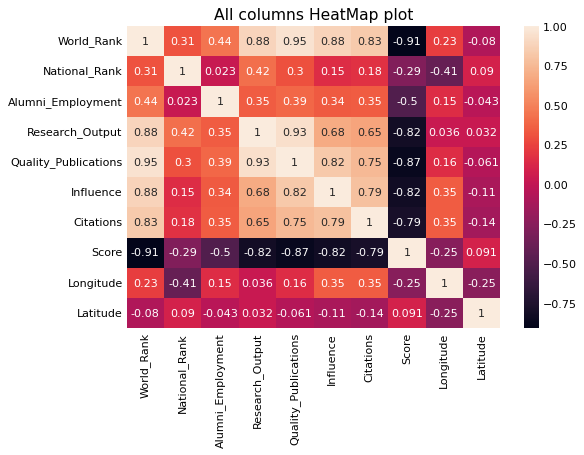

In [69]:
plt.figure(figsize=(8,6), dpi=80)

sns.heatmap(df3.corr(), annot=True)

plt.title('All columns HeatMap plot', fontsize=14)

plt.gcf().subplots_adjust(left=0.22, right=0.95, top=0.90, bottom=0.27)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\df3_heatmap.png")

plt.show()

* You can see the difference between this HeatMap plot and the previous one.

> World Rank vs. Score Scatter plot

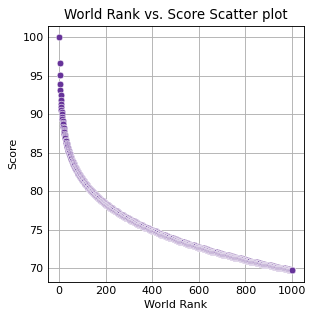

In [70]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='World_Rank', y='Score', color='rebeccapurple')

plt.title('World Rank vs. Score Scatter plot')
plt.xlabel('World Rank')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\World_Rank_Score_scatter.png")

plt.show()

> National Rank vs. Score Scatter plot

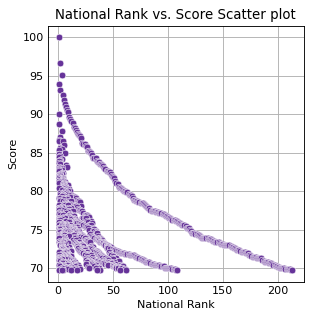

In [71]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='National_Rank', y='Score', color='rebeccapurple')

plt.title('National Rank vs. Score Scatter plot')
plt.xlabel('National Rank')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\National_Rank_Score_scatter.png")

plt.show()

> Alumni Employment vs. Score Scatter plot

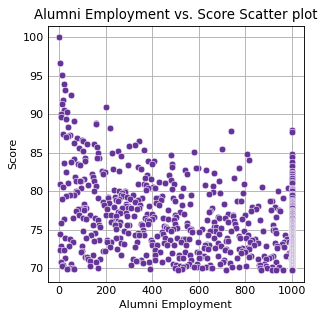

In [72]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Alumni_Employment', y='Score', color='rebeccapurple')

plt.title('Alumni Employment vs. Score Scatter plot')
plt.xlabel('Alumni Employment')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Alumni_Employment_Score_scatter.png")

plt.show()

> Research Output vs. Score Scatter plot

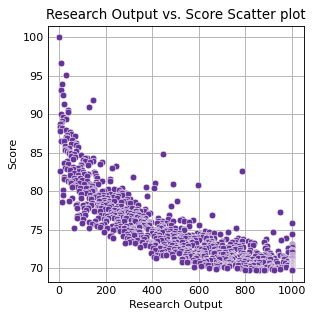

In [73]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Research_Output', y='Score', color='rebeccapurple')

plt.title('Research Output vs. Score Scatter plot')
plt.xlabel('Research Output')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Research_Output_Score_scatter.png")

plt.show()

> Quality Publications vs. Score Scatter plot

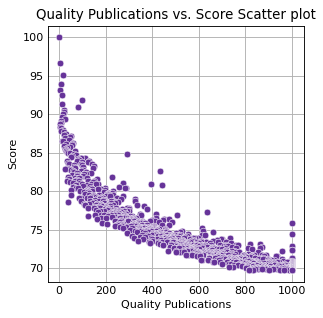

In [74]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Quality_Publications', y='Score', color='rebeccapurple')

plt.title('Quality Publications vs. Score Scatter plot')
plt.xlabel('Quality Publications')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Quality_Publications_Score_scatter.png")

plt.show()

> Influence vs. Score Scatter plot

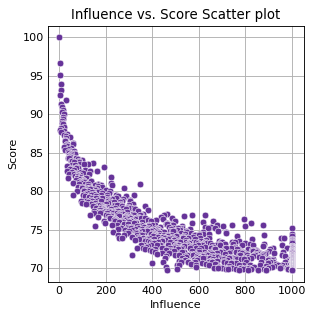

In [75]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Influence', y='Score', color='rebeccapurple')

plt.title('Influence vs. Score Scatter plot')
plt.xlabel('Influence')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Influence_Score_scatter.png")

plt.show()

> Citations vs. Score Scatter plot

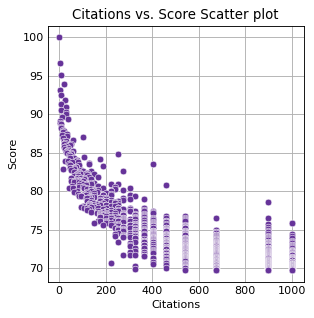

In [76]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Citations', y='Score', color='rebeccapurple')

plt.title('Citations vs. Score Scatter plot')
plt.xlabel('Citations')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Citations_Score_scatter.png")

plt.show()

> Quality of Education vs. Score Scatter plot

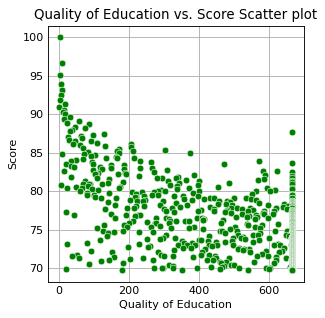

In [77]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df2x, x='Quality_of_Education', y='Score', color='green')

plt.title('Quality of Education vs. Score Scatter plot')
plt.xlabel('Quality of Education')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Quality_of_Education2_Score_scatter.png")

plt.show()

> Quality of Faculty vs. Score Scatter plot

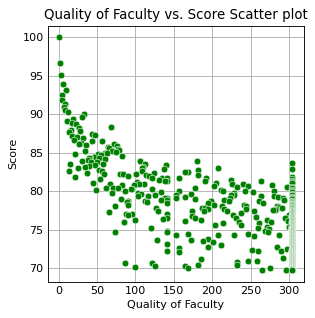

In [78]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df2x, x='Quality_of_Faculty', y='Score', color='green')

plt.title('Quality of Faculty vs. Score Scatter plot')
plt.xlabel('Quality of Faculty')
plt.ylabel('Score')

plt.gcf().subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Quality_of_Faculty2_Score_scatter.png")

plt.show()

**Let's create a series of meaningful scatter plots using different features to explore their relationships.**

> World Rank vs. Research Output Scatter plot

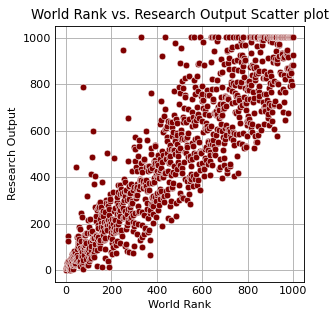

In [79]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='World_Rank', y='Research_Output', color='maroon')

plt.title('World Rank vs. Research Output Scatter plot')
plt.xlabel('World Rank')
plt.ylabel('Research Output')

plt.gcf().subplots_adjust(left=0.17, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\World Rank vs. Research Output.png")

plt.show()

> World Rank vs. Quality Publications Scatter plot

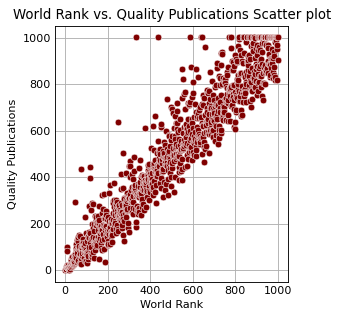

In [80]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='World_Rank', y='Quality_Publications', color='maroon')

plt.title('World Rank vs. Quality Publications Scatter plot')
plt.xlabel('World Rank')
plt.ylabel('Quality Publications')

plt.gcf().subplots_adjust(left=0.17, right=0.90, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\World Rank vs. Quality Publications.png")

plt.show()

> World Rank vs. Alumni Employment Scatter plot

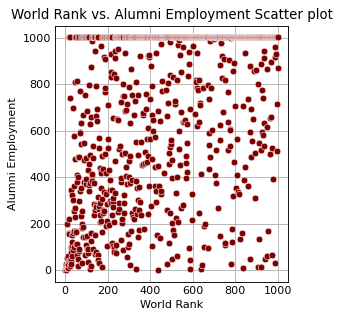

In [81]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='World_Rank', y='Alumni_Employment', color='maroon')

plt.title('World Rank vs. Alumni Employment Scatter plot')
plt.xlabel('World Rank')
plt.ylabel('Alumni Employment')

plt.gcf().subplots_adjust(left=0.17, right=0.90, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\World Rank vs. Alumni Employment.png")

plt.show()

> Quality Publications vs. Alumni Employment Scatter plot

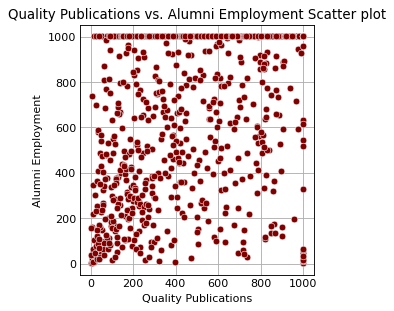

In [82]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Quality_Publications', y='Alumni_Employment', color='maroon')

plt.title('Quality Publications vs. Alumni Employment Scatter plot')
plt.xlabel('Quality Publications')
plt.ylabel('Alumni Employment')

plt.gcf().subplots_adjust(left=0.17, right=0.90, top=0.90, bottom=0.12)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\Quality Publications vs. Alumni Employment.png")

plt.show()

> Citations vs. Research Output Scatter plot

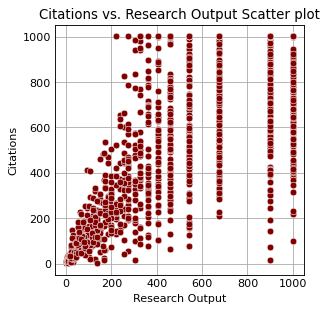

In [83]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df3, x='Citations', y='Research_Output', color='maroon')

plt.title('Citations vs. Research Output Scatter plot')
plt.xlabel('Research Output')
plt.ylabel('Citations')

plt.gcf().subplots_adjust(left=0.17, right=0.95, top=0.90, bottom=0.12)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\Citations vs. Research Output.png")

plt.show()

> Research Output vs. Quality of Faculty Scatter plot

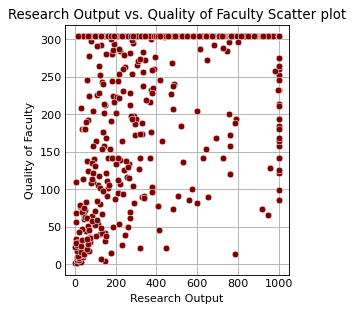

In [84]:
plt.figure(figsize=(4,4), dpi=80)

sns.scatterplot(data=df2x, x='Research_Output', y='Quality_of_Faculty', color='maroon')

plt.title('Research Output vs. Quality of Faculty Scatter plot')
plt.xlabel('Research Output')
plt.ylabel('Quality of Faculty')

plt.gcf().subplots_adjust(left=0.15, right=0.85, top=0.90, bottom=0.12)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\Feature vs feature\\Research Output vs. Quality of Faculty.png")

plt.show()

**Let's implement some overlap scatter plots.**

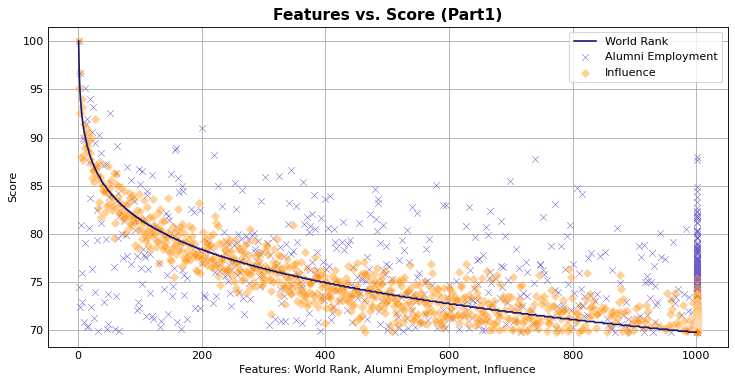

In [85]:
plt.figure(figsize=(10,5), dpi=80)

#1
sns.lineplot(data=df3, x='World_Rank', y='Score', label='World Rank', color='midnightblue')

#2
sns.scatterplot(data=df3, x='Alumni_Employment', y='Score', label=f'Alumni Employment', marker="x", alpha=0.9, color='slateblue')

#5
sns.scatterplot(data=df3, x='Influence', y='Score', label=f'Influence', marker="D", alpha=0.4, color='Darkorange')

plt.title('Features vs. Score (Part1)', fontsize=14, fontweight='bold')

plt.xlabel('Features: World Rank, Alumni Employment, Influence')

plt.legend(loc='best')

plt.gcf().subplots_adjust(left=0.1, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\combined\\Features vs. Score (Part1).png")

plt.show()

* As observed in the above scatterplot (part1), the patterns of change in the World Rank and Influence features closely mirror each other and exhibit nearly identical correlations with the Score.
* In contrast, the Alumni Employment feature, demonstrates considerable variability and displays a weaker correlation with other features and the Score.
* The plot unmistakably illustrates that as the values of other features increase, the Score tends to decrease.
* This outcome is in line with expectations since these features reflect the rankings of universities across diverse fields.
* Consequently, a higher university score corresponds to a lower and more favorable rank.
* Notably, for universities with a ranking below 200 in Alumni Employment, the average score typically falls within the range of 70 to 85.

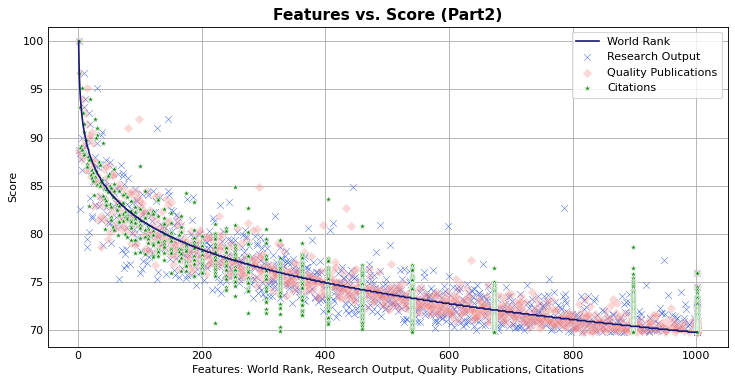

In [86]:
plt.figure(figsize=(10,5), dpi=80)

#1
sns.lineplot(data=df3, x='World_Rank', y='Score', label='World Rank', color='midnightblue')

#3
sns.scatterplot(data=df3, x='Research_Output', y='Score', label=f'Research Output', marker="x", alpha=0.9, color='royalblue')

#4
sns.scatterplot(data=df3, x='Quality_Publications', y='Score', label=f'Quality Publications', marker="D", alpha=0.3, color='lightcoral')

#6
sns.scatterplot(data=df3, x='Citations', y='Score', label=f'Citations', marker="*", alpha=0.9, color='green')

plt.title('Features vs. Score (Part2)', fontsize=14, fontweight='bold')

plt.xlabel('Features: World Rank, Research Output, Quality Publications, Citations')

plt.legend(loc='best')

plt.gcf().subplots_adjust(left=0.1, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\combined\\Features vs. Score (Part2).png")

plt.show()

* As observed in the above scatterplot (part2), the patterns of change in the World Rank, Research Output, Quality Publications, and Citations features closely mirror each other and exhibit nearly identical correlations with the Score.
* The plot unmistakably illustrates that as the values of other features increase, the Score tends to decrease.
* This outcome is in line with expectations since these features reflect the rankings of universities across diverse fields.
* Consequently, a higher university score corresponds to a lower and more favorable rank.

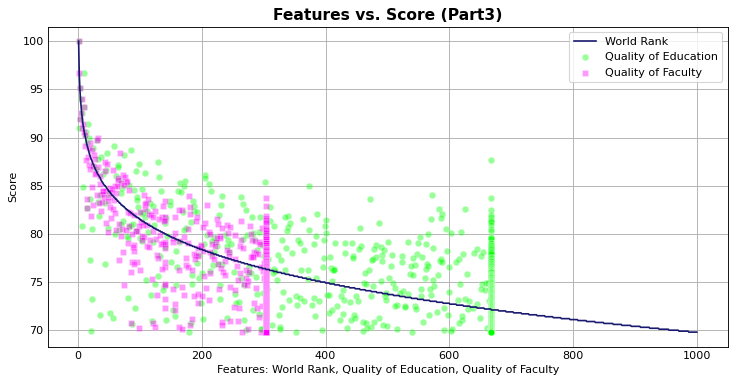

In [87]:
plt.figure(figsize=(10,5), dpi=80)

#1
sns.lineplot(data=df3, x='World_Rank', y='Score', label='World Rank', color='midnightblue')

#7
sns.scatterplot(data=df2x, x='Quality_of_Education', y='Score', label=f'Quality of Education', marker="o", alpha=0.4, color='lime')

#8
sns.scatterplot(data=df2x, x='Quality_of_Faculty', y='Score', label=f'Quality of Faculty', marker="s", alpha=0.4, color='magenta')

plt.title('Features vs. Score (Part3)', fontsize=14, fontweight='bold')

plt.xlabel('Features: World Rank, Quality of Education, Quality of Faculty')

plt.legend(loc='best')

plt.gcf().subplots_adjust(left=0.1, right=0.95, top=0.90, bottom=0.10)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.3\\combined\\Features vs. Score (Part3).png")

plt.show()

* This plot (part3) does not show us anything special.

### <span style="color:green">d) Categorical / Numerical Variables Analysing</span>

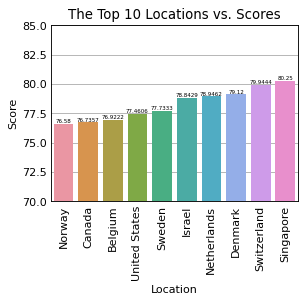

In [88]:
# The Top 10 Locations vs. Scores for All Countries:
plt.figure(figsize=(4,4), dpi=80)

a  = pd.DataFrame(df3.groupby('Location')['Score'].mean().nlargest(10)).sort_values('Score')
ax = sns.barplot(data=a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0], fontsize=5)

plt.title('The Top 10 Locations vs. Scores')

plt.ylim(70,85)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.15, right=0.92, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\The Top 10 Locations vs. Scores.png")

plt.show()

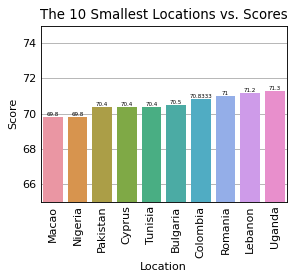

In [89]:
# The 10 Smallest Locations vs. Scores for All Countries:
plt.figure(figsize=(4,4), dpi=80)

a  = pd.DataFrame(df3.groupby('Location')['Score'].mean().nsmallest(10)).sort_values('Score')
ax = sns.barplot(data=a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0], fontsize=5)

plt.title('The 10 Smallest Locations vs. Scores')

plt.ylim(65,75)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.15, right=0.92, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\The 10 Smallest Locations vs. Scores.png")

plt.show()

* The barplot displayed above illustrates the rankings of the top and bottom 10 countries based on their Scores.
* Notably, Singaporean universities occupy the top position with an average score of 80.25.
* This is consistent with their leading performance across most ranking criteria, making it evident that Singapore holds the highest score.

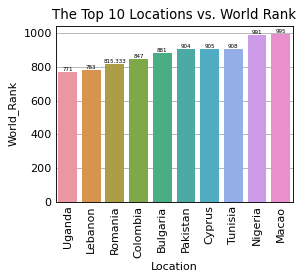

In [90]:
# The Top 10 Locations vs. World_Rank for All Countries:
plt.figure(figsize=(4,4), dpi=80)

a  = pd.DataFrame(df3.groupby('Location')['World_Rank'].mean().nlargest(10)).sort_values('World_Rank')
ax = sns.barplot(data=a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0], fontsize=5)

plt.title('The Top 10 Locations vs. World Rank')

#plt.ylim(70,82)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.18, right=0.92, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\The Top 10 Locations vs. World Rank.png")

plt.show()

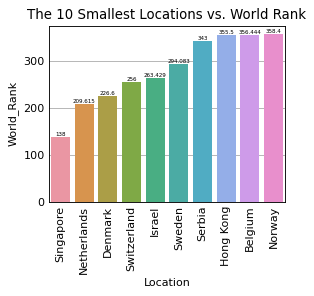

In [91]:
# The 10 Smallest Locations vs. World_Rank for All Countries:
plt.figure(figsize=(4,4), dpi=80)

a  = pd.DataFrame(df3.groupby('Location')['World_Rank'].mean().nsmallest(10)).sort_values('World_Rank')
ax = sns.barplot(data=a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0], fontsize=5)

plt.title('The 10 Smallest Locations vs. World Rank')

#plt.ylim(70,82)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.18, right=0.92, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\The 10 Smallest Locations vs. World Rank.png")

plt.show()

* The barplot above displays the highest-ranking and lowest-ranking countries on a global scale, with Singaporean universities rightfully taking the top spot, boasting an average global ranking of 138, as anticipated.

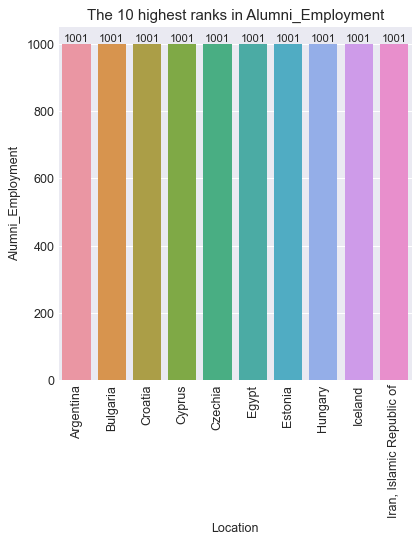

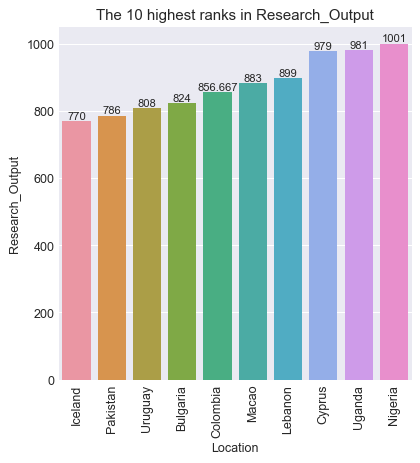

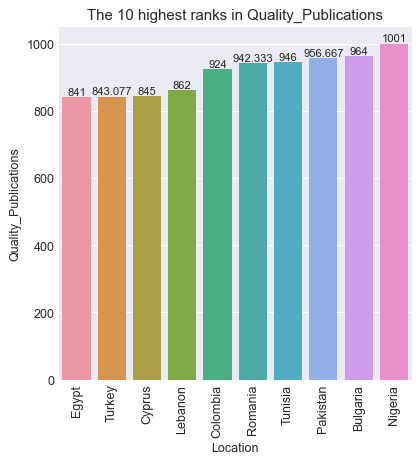

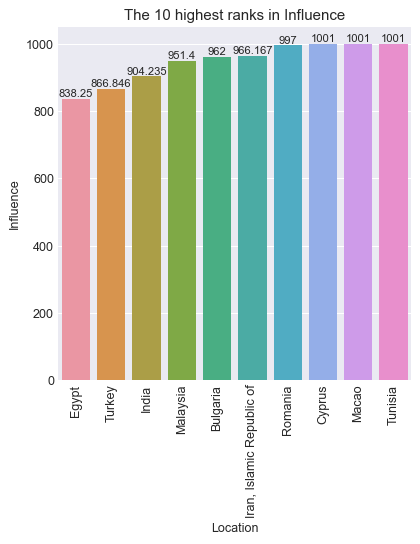

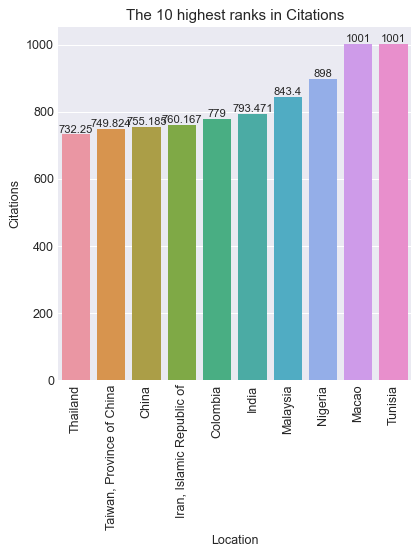

In [121]:
# The 10 highest (bad) rank countries versus the other 5 features:

features = ['Alumni_Employment', 'Research_Output', 'Quality_Publications', 'Influence', 'Citations']

for col in df3[features].columns:
    plt.figure(figsize=(4,4), dpi=90)
    
    a  = pd.DataFrame(df3.groupby('Location')[col].mean().nlargest(10)).sort_values(col)
    ax = sns.barplot(data=a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0], fontsize=9)
    
    plt.title(f'The 10 highest ranks in {col}')
    
    #plt.ylim(550,1100)
    
    plt.xticks(rotation=90)
        
    plt.show()

**In these bar plots, we examined the lowest (bad ranked) 10 countries across various fields.<br>
Each plot displays 10 relevant countries along with their respective values.<br>
Here are the key observations:**<br>

* 1- When looking at the depiction of 10 countries with lower global ranks in the **Alumni_Employment** feature, it's worth noting that all ten countries had ranks exceeding 1000. This suggests these countries had the poorest performance in employing their graduates. Regrettably, our country is also among these nations, indicating that graduates from our top universities either emigrate or struggle to find employment.

* 2- In terms of **Research_Output**, Nigeria ranks the lowest among the 1000 countries in research output. Other countries with better research conditions follow Nigeria in the plot.

* 3- Analyzing the **Quality_Publications** column reveals Nigeria as the leader, followed by Bulgaria as the second lowest in terms of publication quality.

* 4- When it comes to **Influence** and reputation, Tunisia holds the lowest position, while Macao and Cyprus rank second and third among the most discredited universities globally. Romania is fourth, and regrettably, Iran holds the fifth position.

* 5- Regarding **Citations**, Tunisia again ranks as the weakest country, and our country takes the seventh position in this plot.

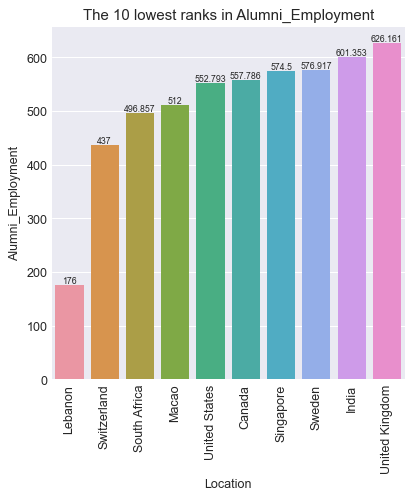

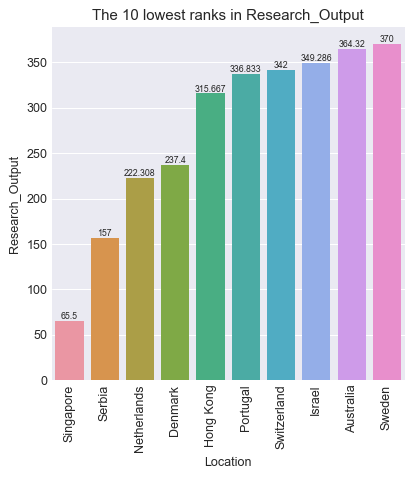

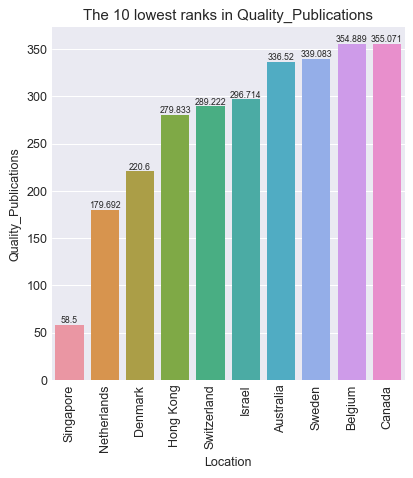

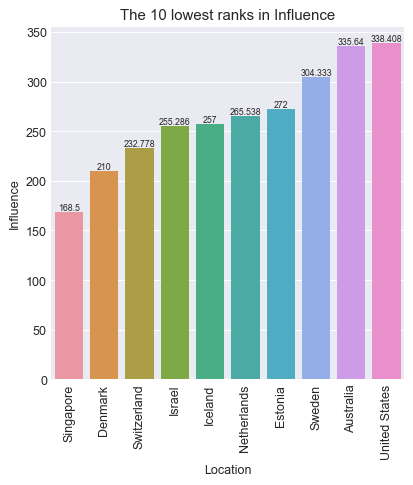

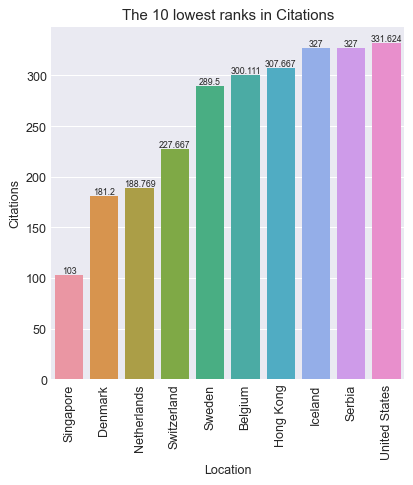

In [122]:
# The 10 lowest (good) rank countries versus the other 5 features:

features = ['Alumni_Employment', 'Research_Output', 'Quality_Publications', 'Influence', 'Citations']

for col in df3[features].columns:
    plt.figure(figsize=(4,4), dpi=90)

    a  = pd.DataFrame(df3.groupby('Location')[col].mean().nsmallest(10)).sort_values(col)
    ax = sns.barplot(data=a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0], fontsize=7)
    
    plt.title(f'The 10 lowest ranks in {col}')
    
    plt.xticks(rotation=90)
    
    plt.show()

**In these plots, we focused on the top 10 countries globally in the fields of graduate employment, research output, quality of publications, university reputation, and referral rate.<br>
For each plot, we presented the top 10 relevant countries and their respective values.<br>
Here's a summary:**<br>

* 1- In the **Alumni_Employment** feature, England leads the world in graduate employment, followed by India and Sweden in second and third place, respectively. The United States holds the sixth position.

* 2- For **Research_Output**, Sweden demonstrates the best performance among the 1000 countries, with Australia and Israel ranking second and third.

* 3- Canada leads in the **Quality_Publications** column.

* 4- As expected, American universities rank highest in terms of **Influence** and credit. Australia and Sweden secure the second and third positions.

* 5- The United States maintains the top rank in the number of **Citations**, followed by Serbia and Iceland.

**In light of the explanations given above, it's worth noting that Singapore is represented by just two universities in this particular ranking! And in many plots, it's there!**<br>

* Therefore, it could be also insightful to take a look at countries that feature less than 10 universities (for countries having a minimum of 10 universities:

In [94]:
selected_country = df3['Location'].value_counts()
selected_country = selected_country[selected_country >= 10].index
df4 = df3.copy()
df4 = df4[df4.Location.isin(selected_country)]

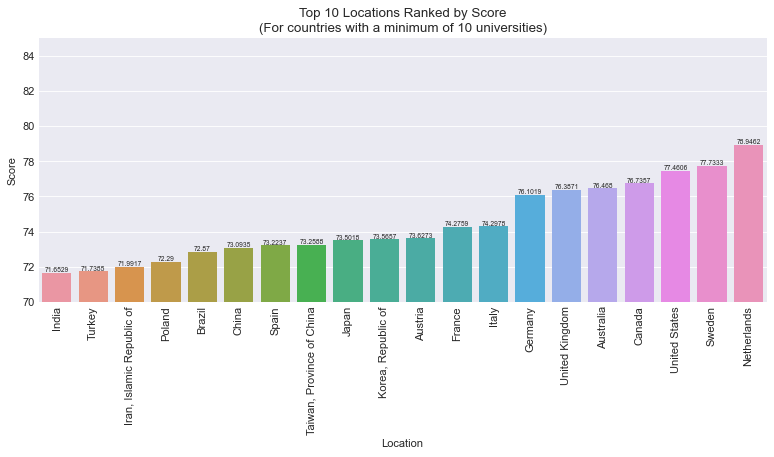

In [126]:
# analyzing "Location" and "Score" in countries with at least 10 universities
plt.figure(figsize=(10,6), dpi=80)

a  = pd.DataFrame(df4.groupby('Location')['Score'].mean()).sort_values('Score')
ax = sns.barplot(data=a, y=a.Score, x=a.index)
ax.bar_label(ax.containers[0], fontsize=6)

plt.title('Top 10 Locations Ranked by Score\n(For countries with a minimum of 10 universities)')

plt.ylim(70,85)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.06, right=0.97, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\Top 10 Locations Ranked by Score.png")

plt.show()

* The above bar plot illustrates the average "score"s for nations featuring at least 10 universities in the ranking.
* Dutch (Netherlands) universities take the top spot, followed by Swedish and American universities.
* Regrettably, our country, along with Turkey and India, occupies the lower end of this list.

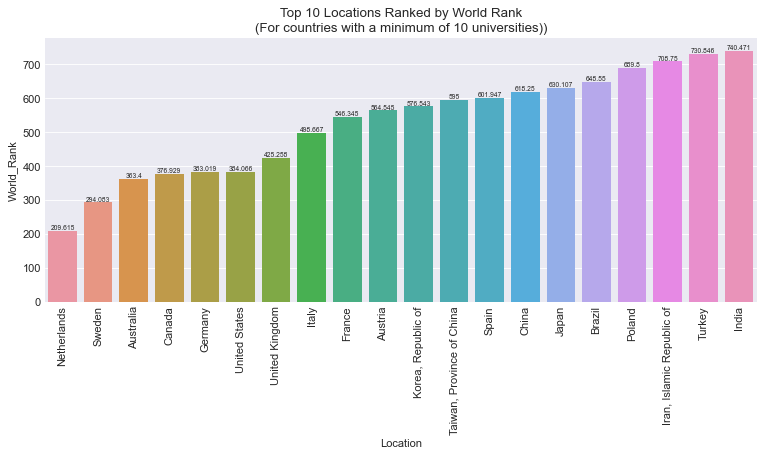

In [128]:
# analyzing "Location" and "World Rank" in countries with at least 10 universities

plt.figure(figsize=(10,6), dpi=80)

a  = pd.DataFrame(df4.groupby('Location')['World_Rank'].mean()).sort_values('World_Rank')
ax = sns.barplot(data=a, y=a.World_Rank, x=a.index)
ax.bar_label(ax.containers[0], fontsize=6)

plt.title('Top 10 Locations Ranked by World Rank\n(For countries with a minimum of 10 universities))')

#plt.ylim(70,85)

plt.xticks(rotation=90)

plt.gcf().subplots_adjust(left=0.08, right=0.97, top=0.90, bottom=0.35)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.4\\Top 10 Locations Ranked by World Rank.png")

plt.show()

* For countries featuring at least 10 universities in the ranking, this bar plot shown above presents the global ranking, reflecting the findings observed in the previous Score barplot.
* The arrangement of these universities can be seen above. So that India is ranked first in this chart followed by Turkey and out country.

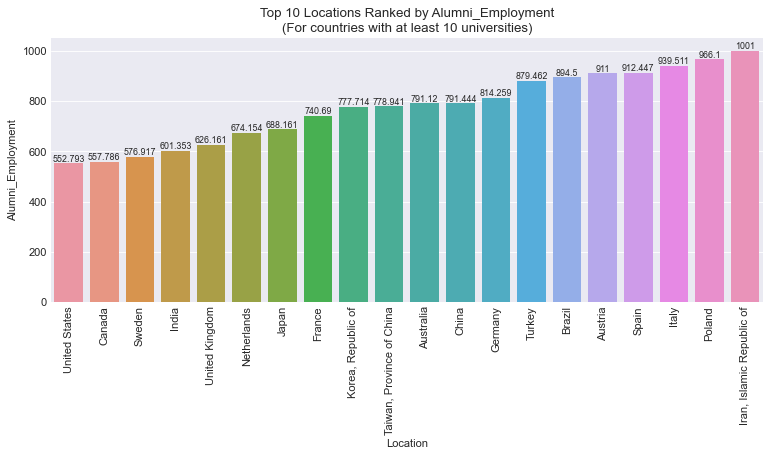

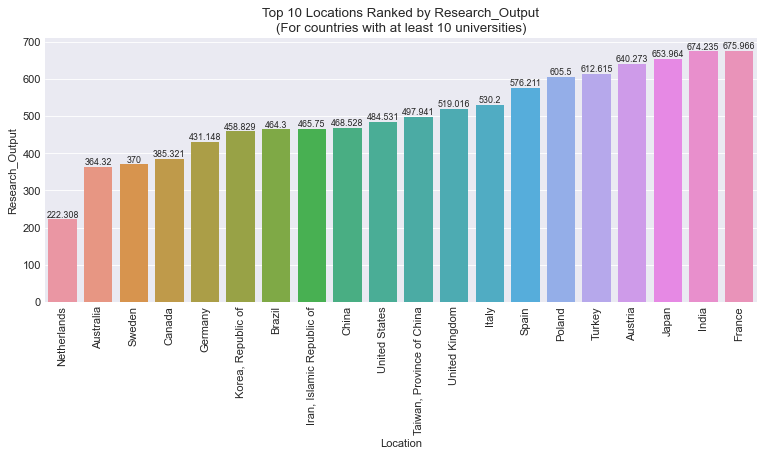

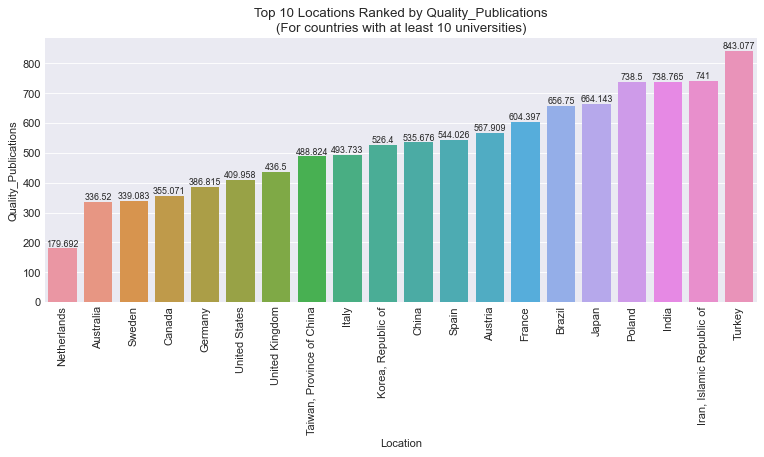

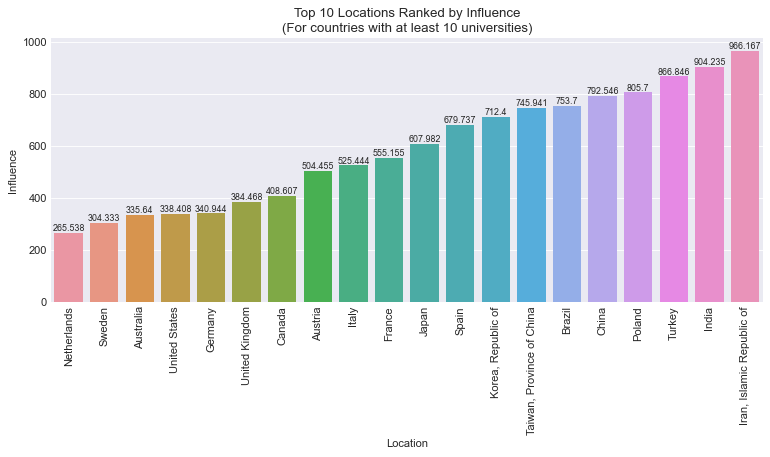

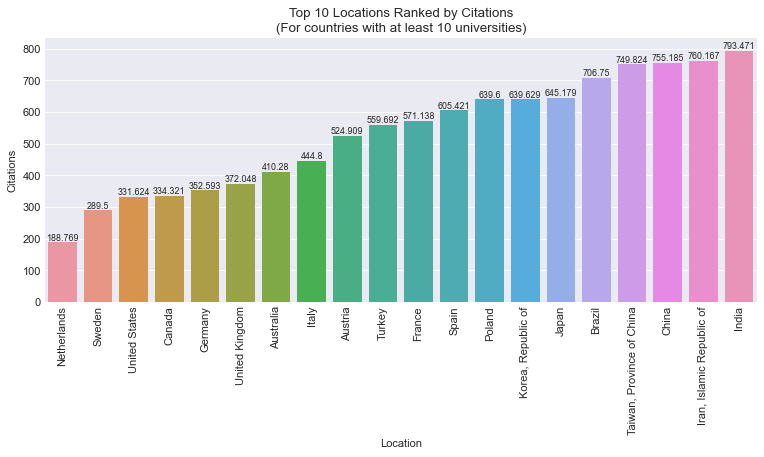

In [132]:
# analyzing "Location" and the other features in countries with at least 10 universities

my_col = ['Alumni_Employment', 'Research_Output', 'Quality_Publications', 'Influence', 'Citations']

for col in df4[my_col].columns:
    plt.figure(figsize=(10,6), dpi=80)
    
    a  = pd.DataFrame(df4.groupby('Location')[col].mean()).sort_values(col)
    ax = sns.barplot(data=a, y=a[col], x=a.index)
    ax.bar_label(ax.containers[0], fontsize=8)
    
    plt.title(f'Top 10 Locations Ranked by {col}\n(For countries with at least 10 universities)')
    
    #plt.ylim(450,1050)
    
    plt.xticks(rotation=90)
    
    plt.gcf().subplots_adjust(left=0.08, right=0.97, top=0.90, bottom=0.35)
    
    plt.show()

**For countries with a minimum of 10 universities in the ranking, the bar plots above show rankings in various categories:**

* 1- **Alumni_Employment**, American universities take the lead with an average rank of 553.

* 2- **Research_Output**, Dutch (Netherlands) universities lead with an average rank of 222, while India and France rank at the bottom with a slight margin.

* 3- **Quality_Publications**, Dutch (Netherlands) universities top the list with an average rank of 180.

* 4- **Influence**, Dutch (Netherlands) universities are at the forefront with an average rank of 266.

* 5- **Citations**, Dutch (Netherlands) universities have the highest average rank of 189.

These plots reveal that, among these countries, our country's universities are not performing very well, and, in most cases, Iranian universities are at the bottom of the list.

## <span style="color:green">e) Some other plottings are:</span>

**Here, we need to run the following code to create additional plots.**

Here we use the command ".unique()" to give us the names of the countries without repetition as output:

In [135]:
df3.Location.unique()

array(['United States', 'United Kingdom', 'Japan', 'Canada',
       'Switzerland', 'France', 'Denmark', 'Israel', 'Germany', 'Sweden',
       'Australia', 'Korea, Republic of', 'Italy', 'Netherlands',
       'Norway', 'Brazil', 'Spain', 'China', 'Finland', 'Singapore',
       'Belgium', 'Taiwan, Province of China', 'Russian Federation',
       'Hong Kong', 'Austria', 'Czechia', 'Portugal', 'South Africa',
       'Ireland', 'New Zealand', 'Mexico', 'Poland', 'Argentina',
       'Greece', 'Saudi Arabia', 'Chile', 'Serbia', 'Slovenia',
       'Iran, Islamic Republic of', 'Hungary', 'India', 'Malaysia',
       'Egypt', 'Croatia', 'Thailand', 'Iceland', 'Estonia', 'Turkey',
       'Slovakia', 'Uruguay', 'Lithuania', 'Colombia', 'Uganda',
       'Lebanon', 'Pakistan', 'Romania', 'Bulgaria', 'Cyprus', 'Tunisia',
       'Nigeria', 'Macao'], dtype=object)

In [145]:
# Let's compute their std,
# std: standard deviation
# .mean(), .var(), .sum(), and other statistics parameters that can also be use

df10 = df3.groupby(pd.Grouper(key="Location"), as_index=False).std(ddof=0)

Columnsss = ["Switzerland",
             "Sweden",
             "Netherlands",
             "Finland",
             "Belgium",
             "Austria",
             "Poland",
             "Iran, Islamic Republic of",
             "Turkey"]
              
# distinguish nations with an equal count of universities:

df11 = df10[(df10["Location"].isin(Columnsss))]

df11

,Location,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude
4,Switzerland,324.832949,2.581989,326.935264,343.573379,314.495991,304.413015,278.092311,5.225176,1.039004,0.478862
9,Sweden,213.893454,3.452053,340.976406,296.016047,278.986994,229.640419,197.814096,3.859908,24.262712,4.790235
13,Netherlands,134.171841,3.741657,298.004865,189.475545,152.323232,261.954082,161.072441,2.898704,0.707748,0.539051
18,Finland,225.963342,2.581989,292.150942,265.087593,234.294265,202.442859,217.698795,3.096753,2.113935,1.492762
20,Belgium,309.410591,2.581989,257.543955,330.842397,276.830251,290.323957,273.497286,3.917703,0.594599,0.175574
24,Austria,251.495297,3.162278,161.958468,233.322676,211.721281,245.878523,286.190164,2.799705,1.416778,0.489620
31,Poland,215.511392,2.872281,84.754292,173.775861,201.934767,230.923386,235.592105,2.147766,0.820852,0.958148
38,"Iran, Islamic Republic of",187.080698,3.452053,0.000000,198.866004,194.491645,100.871067,207.779464,1.618363,2.523453,1.818242
47,Turkey,150.026585,3.741657,192.564721,188.148280,122.954940,180.655578,172.482055,1.162582,3.339634,1.160509


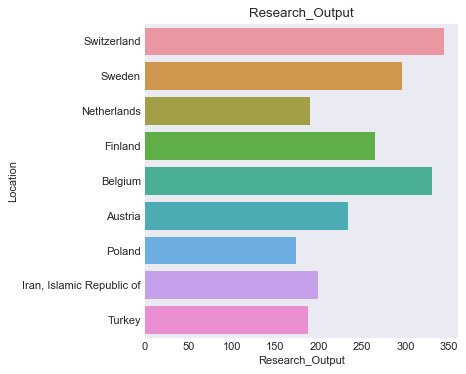

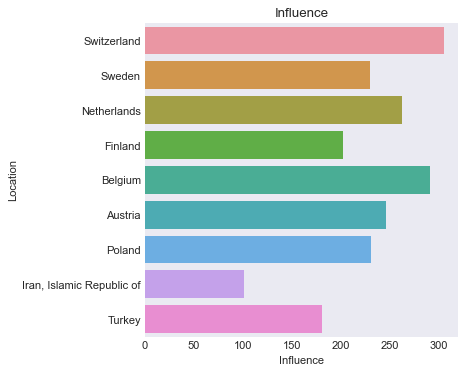

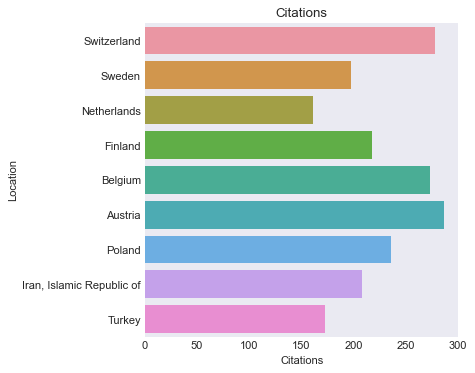

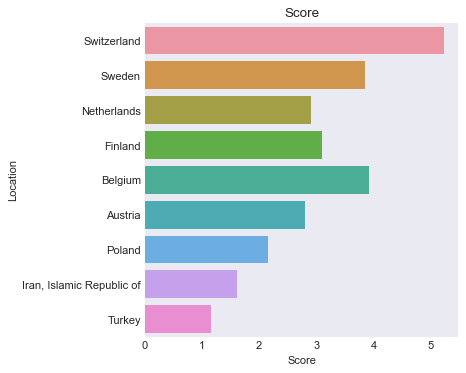

In [142]:
# another kind of bar plot

column = ['Research_Output', 'Influence', 'Citations', 'Score']

plt.style.use('seaborn-dark')

for col in column:
    plt.figure(figsize=(4,4), dpi=80)
    sns.barplot(data=df11, x=col, y='Location')
    plt.title(col)
    plt.show()

* In general, a low standard deviation suggests data is tightly clustered around the mean, indicating little variation. Conversely, a high standard deviation indicates significant data dispersion.

* The above plots assess the consistency of university rankings within each country. The results show that Turkish universities have minimal standard deviation, indicating their rankings are closely grouped. Similarly, Iranian universities exhibit limited deviation, suggesting a consistent pattern. In contrast, Swiss universities display more variability, with some ranking at the top and others at the bottom.

**Now we want to draw other plots in which we examine the universities of Iran:Now we want to draw other plots in which we examine the universities of Iran:**

In [146]:
# assess the performance of Iranian universities in terms of "Alumni_Employment", "Research_Output", and "Citations"

iranian_universities = df3[df3.Location == 'Iran, Islamic Republic of']

fig = go.Figure()

fig.add_trace(go.Bar(y=iranian_universities.Institution,
                     x=iranian_universities.Alumni_Employment,
                     text=iranian_universities.Alumni_Employment,
                     name='Alumni_Employment',
                     marker_color='mediumpurple',
                     orientation='h'))

fig.add_trace(go.Bar(y=iranian_universities.Institution,
                     x=iranian_universities.Research_Output,
                     text=iranian_universities.Research_Output,
                     name='Research Output',
                     marker_color='seagreen',
                     orientation='h'))

fig.add_trace(go.Bar(y=iranian_universities.Institution,
                     x=iranian_universities.Citations,
                     text=iranian_universities.Citations,
                     name='Citations',
                     marker_color='orange',
                     orientation='h'))

#Here, we adjust the x-axis tick angle, which causes the labels to rotate.
fig.update_layout(barmode='group',
                  width=1000,
                  height=1000,
                  title='Alumni Employment, Research Output, and Citations')

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.5\\newplot.png")

fig.show()

**The above plot shows that some Iranian universities, while achieving respectable research output rankings, do not receive a proportionate number of citations.**

* For example, the 1st university of the plot, the Shahid Beheshti University, may have fewer published articles but garners more references for them, indicating higher article quality.

* Or Shiraz University, my university :), doing an acceptable job in their research output.

* On the other hand, we have the University of Tehran, which has a substantial publication count but struggles to receive a corresponding number of references, highlighting a discrepancy.


Unfortunately, despite strong performance in Citations, all Iranian universities rank at the bottom in terms of Alumni_Employment.

**In the next three charts, we'll visualize the state of our DataFrame using pie charts.**

In [149]:
# Pie1

fig = px.sunburst(df3, path=['Location'])

fig.update_traces(textinfo="label + percent parent")

fig.update_layout(title_text="Universities categorized by their geographic location:", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750)

fig.show()

* As indicated by the data, the United States, China, and the United Kingdom hold the top three positions for the highest number of universities in the ranking, respectively.

In [150]:
# Pie2

fig = px.sunburst(df3, path=['Continent'])

fig.update_traces(textinfo="label + percent parent")

fig.update_layout(title_text="Universities categorized by their respective continents:", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750)

fig.show()

* Obviously, Europe, Asia, and North America, in that sequence, house the largest number of universities in the ranking.

In [151]:
# Pie3

fig = px.sunburst(df3[:50], path=['Institution', 'Location', 'Continent'])

fig.update_traces(textinfo="label + percent parent")

fig.update_layout(title_text="Universities categorized by continent and geographic location:", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750)
fig.show()

* This pie chart shows universities categorized by continent and geographic location.

**Plotting a 2D Scatter plot to display "Research Output" and "Quality Publications" vs. "World Rank":**

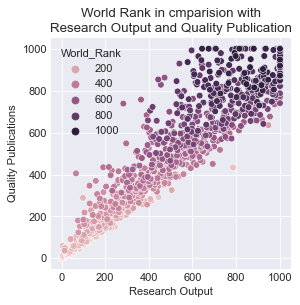

In [154]:
# plot a 2D scatter plot to display "Research Output" and "Quality Publications" against "World Rank"
plt.figure(figsize=(4,4), dpi=80)

plt.style.use('_mpl-gallery')

sns.scatterplot(data=df3, x='Research_Output', y='Quality_Publications', hue='World_Rank')

plt.title('World Rank in cmparision with\nResearch Output and Quality Publication')
plt.xlabel('Research Output')
plt.ylabel('Quality Publications')

plt.gcf().subplots_adjust(left=0.20, right=0.95, top=0.85, bottom=0.13)

#plt.savefig("D:\\IMT\\3- Data Science\\14- Final project\\savefig\\3\\3.5\\2Dscatter.png")

plt.show()

**Here, we present a 2D Scatter plot viewed from a different perspective.**
* It's evident that the **Research Output** and **Quality Publications** parameters are strongly correlated, indicating that an increase in one leads to an increase in the other. Specifically, research output is directly related to the quality of publications.

* Additionally, as the **World Rank** increases, the plot colors become darker, signifying a strong and direct correlation with the previously mentioned parameters, likely around +1. This is evident from the roughly 45-degree angle of the line on the graph.

**Plotting a 3D Scatter plot to display "World Rank" and "Research Output" and "Quality Publications" vs. "Score":**

In [155]:
# plot a 3D scatter plot to display World Rank, Research Output, and Quality Publications against Score:

fig = px.scatter_3d(data_frame=df3,
                    x='World_Rank',
                    y='Research_Output',
                    z='Quality_Publications',
                    color='Score',
                    template='plotly',
                    opacity=0.6,
                    height=700,
                    title='World Rank, Research Output, and Quality Publications vs. Score')

fig.update_traces(marker=dict(size=3))

fig.show()

**This is a 3D plot representing the interrelationships between these values.**
* Like the other plots in this section, this plot is interactive. 
* For a more detailed view of this plot, please consult this code page to better understand the status of the data points.
* Note that, the "Score" demonstrates an inverse relationship and decreases.

**From this point on, you will encounter three categories of plots, each displaying our DataFrame information on a world map in various ways:**

**MAP1**

In [156]:
# generating a map to represent the geographical positions of each university

fig = px.scatter_mapbox(df3,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Institution',
                        color=df3["Score"],
                        hover_data=["World_Rank", "Continent", "Score"],
                        zoom=5,
                        mapbox_style="open-street-map")

fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

* This map can also be zoomed in/out.

**MAP2**

In [159]:
df20 = pd.DataFrame(df3[['Location','Iso_loc']].value_counts().reset_index())

df20.rename(columns={0:'Uni_num'}, inplace=True)

df20

,Location,Iso_loc,Uni_num
0,United States,USA,213
1,China,CHN,108
2,United Kingdom,GBR,62
3,France,FRA,58
4,Japan,JPN,56
...,...,...,...
56,Iceland,ISL,1
57,Estonia,EST,1
58,Cyprus,CYP,1
59,Bulgaria,BGR,1


In [160]:
data2 = pd.DataFrame(df3.groupby(['Location','Iso_loc']).mean().reset_index())

data2

,Location,Iso_loc,World_Rank,National_Rank,Alumni_Employment,Research_Output,Quality_Publications,Influence,Citations,Score,Longitude,Latitude
0,Argentina,ARG,533.333333,2.0,1001.000000,483.666667,539.333333,581.000000,558.000000,73.733333,-62.772272,-34.869995
1,Australia,AUS,363.400000,13.0,791.120000,364.320000,336.520000,335.640000,410.280000,76.468000,143.825257,-33.880949
2,Austria,AUT,564.545455,6.0,911.000000,640.272727,567.909091,504.454545,524.909091,73.627273,14.875389,47.658644
3,Belgium,BEL,356.444444,5.0,683.000000,399.444444,354.888889,368.666667,300.111111,76.922222,4.384004,50.822263
4,Brazil,BRA,648.550000,10.5,894.500000,464.300000,656.750000,753.700000,706.750000,72.870000,-49.445038,-16.084278
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Turkey,TUR,730.846154,7.0,879.461538,612.615385,843.076923,866.846154,559.692308,71.738462,31.777499,39.511843
57,Uganda,UGA,771.000000,1.0,1001.000000,981.000000,779.000000,456.000000,673.000000,71.300000,32.568234,0.335151
58,United Kingdom,GBR,425.258065,31.5,626.161290,519.016129,436.500000,384.467742,372.048387,76.387097,-1.938035,53.047534
59,United States,USA,384.065728,107.0,552.793427,484.530516,409.957746,338.408451,331.624413,77.460563,-90.734693,38.456426


In [162]:
# generating a map to illustrate the count of universities in each country, with color indicating the number

fig = px.choropleth(data1,
                    locations="Iso_loc",
                    color='Uni_num', # lifeExp is a column of gapminder
                    hover_name="Location", # column to add to hover information
                    color_continuous_scale="Viridis")

fig.update_layout(title_text = 'University count by country (Displayed on the Map)')

fig.show()

**MAP3**

In [164]:
# generating a map to exhibit the average value of each column for every country, distinguished by color

my_cols = ['World_Rank',
           'Alumni_Employment',
           'Research_Output',
           'Quality_Publications',
           'Influence',
           'Citations',
           'Score']

for col in my_cols:
    fig = px.choropleth(data2,
                        locations="Iso_loc",
                        color=col, # lifeExp is a column of gapminder
                        hover_name="Location", # column to add to hover information
                        color_continuous_scale="spectral")
    fig.update_layout(title_text = f'Mean of {col} vs. Location')

    fig.show()

**Explored within the visual representation:**
* 1- **Citation** rankings demonstrate a favorable bias toward North American universities.
* 2- **Influence** rankings also distinctly favor North American academic institutions.
* 3- Both North American and Australian institutions excel in terms of **Quality_Publications**.
* 4- **Alumni_Employment** is characterized by higher rankings among North American universities.